# Example: Cargo Flows

This example replicates SignalOcean's "Cargo Flows" dashboard, which visualizes the flow of cargo of either imports/exports from a specific load area and of a specific vessel class (this example extends the functionality to also call a specific vessel type). This example requires a combination of voyage and vessel data to extract an estimate of their carrying capacity (deadweight). 

In order to import the vessel data, this example will showcase both direct VesselsAPI calls to get vessels by type and class, as well as demonstrate importing from a persisted database. 



## Setup

Install the Signal Ocean SDK:

In [ ]:
pip install signal-ocean

Import required libraries / APIs / packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

from signal_ocean.voyages import VoyagesAPI
from signal_ocean.vessels import VesselsAPI
from signal_ocean import VesselClassAPI, VesselClassFilter, Connection
from datetime import datetime, date, timedelta, timezone

Fill in your personal SignalOcean API subscription key acquired <a href="https://apis.signalocean.com/profile" target="_blank">here</a> and open a connection:

In [2]:
signal_ocean_api_key = '' #replace with your subscription key
connection = Connection(signal_ocean_api_key)

## 1. Importing the Vessel data

This notebook will demonstrate three different ways to import vessel data for the purpose of utillising them in a cargo flows example:

> **1.1.** Get vessels by vessel type.<br>
> **1.2.** Get vessels by vessel class.<br>
> **1.3.** Persist and get vessels from a persisted database (.db file).

Note: Persisting the vessel data, as shown in *section 1.3*, is considered good-practise while working with the SDK.

Now, first of all, we need to instantiate the required vessel APIs,

In [3]:
vessels_api = VesselsAPI(connection)
vessel_class_api = VesselClassAPI(connection)

### 1.1. Get vessel data by vessel type

Specify the vessel type of interest,

In [4]:
vessel_type = 'Dry'

Match vessel type name to ID number for querying the API,

In [5]:
vessel_types = vessels_api.get_vessel_types()
vessel_type_id = next(vt for vt in vessel_types if vt.name==vessel_type).id
vessel_type_id

3

Get all vessels and filter by vessel type,

In [6]:
vessels = vessels_api.get_vessels()
vessels = pd.DataFrame(v.__dict__ for v in vessels)

In [7]:
vessels = vessels.loc[vessels['vessel_type_id'] == vessel_type_id]
vessels

,imo,vessel_type_id,built_for_trade_id,trade_id,vessel_class_id,commercial_operator_id,deadweight,breadth_extreme,gross_rated_tonnage,reduced_gross_tonnage,...,cubic_size,scrubbers_date,summer_tpc,lightship_tonnes,main_engine_manufacturer,delivery_date,classification_register,number_of_holds,grain_capacity,bale_capacity
2,2228228,3,-2,-1,77,-1,20420,22,12827,16169,...,NaN,NaT,NaN,4919.0,NotSet,1985-07-01 00:00:00+00:00,Not set,NaN,NaN,NaN
8,5009984,3,-1,-1,92,-1,10748,17,6969,4154,...,NaN,NaT,NaN,3887.0,NotSet,1906-04-01 00:00:00+00:00,American Bureau of Shipping,8.0,NaN,NaN
15,5018832,3,-1,-1,92,-1,1508,10,942,4154,...,NaN,NaT,NaN,545.0,NotSet,1958-07-01 00:00:00+00:00,Not set,NaN,1853.0,NaN
17,5024738,3,-2,-1,77,-1,25455,21,12449,16169,...,NaN,NaT,39.136977,6132.0,NotSet,1953-01-01 00:00:00+00:00,American Bureau of Shipping,3.0,NaN,NaN
18,5025691,3,-2,-1,77,-1,27128,21,12341,16169,...,NaN,NaT,39.801444,7417.0,NotSet,1952-01-01 00:00:00+00:00,American Bureau of Shipping,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43512,9917488,3,-2,-1,74,-1,81800,32,44670,34044,...,NaN,NaT,68.316000,12324.0,MAN B&W,2021-07-01 00:00:00+00:00,Not set,7.0,97000.0,NaN
43513,9917490,3,-2,-1,74,-1,81800,32,44670,34044,...,NaN,NaT,68.316000,12324.0,MAN B&W,2021-07-01 00:00:00+00:00,Not set,7.0,97000.0,NaN
43515,9920344,3,-2,-1,76,-1,43596,30,24719,22685,...,NaN,NaT,50.398000,8080.0,MAN B&W,2020-07-01 00:00:00+00:00,Not set,5.0,54233.0,NaN
43516,9920411,3,-2,-1,75,-1,60000,32,33189,30375,...,NaN,NaT,61.065000,10881.0,MAN B&W,2020-07-21 00:00:00+00:00,Not set,5.0,70000.0,NaN


### 1.2. Get vessel data by vessel class

Specify the vessel class of interest,

In [8]:
vessel_class = 'Handysize'

Match vessel class name to ID number for querying the API,

In [9]:
vessel_class_id = vessel_class_api.get_vessel_classes(VesselClassFilter(name_like=vessel_class))[0].id
vessel_class_id

77

Get vessels filtered only by the specified vessel class,

In [10]:
vessels = vessels_api.get_vessels_by_vessel_class(vesselClass=vessel_class_id, point_in_time=date.today())
vessels = pd.DataFrame(v.__dict__ for v in vessels)
vessels

,imo,vessel_type_id,built_for_trade_id,trade_id,vessel_class_id,commercial_operator_id,deadweight,breadth_extreme,gross_rated_tonnage,reduced_gross_tonnage,...,cubic_size,scrubbers_date,summer_tpc,lightship_tonnes,main_engine_manufacturer,delivery_date,classification_register,number_of_holds,grain_capacity,bale_capacity
0,2228228,3,-2,-1,77,-1,20420,22,12827,16169,...,NaN,NaT,NaN,4919,NotSet,1985-07-01 00:00:00+00:00,Not set,NaN,NaN,NaN
1,5024738,3,-2,-1,77,-1,25455,21,12449,16169,...,NaN,NaT,39.136977,6132,NotSet,1953-01-01 00:00:00+00:00,American Bureau of Shipping,3.0,NaN,NaN
2,5025691,3,-2,-1,77,-1,27128,21,12341,16169,...,NaN,NaT,39.801444,7417,NotSet,1952-01-01 00:00:00+00:00,American Bureau of Shipping,3.0,NaN,NaN
3,5064685,3,-2,-1,77,-1,26214,23,17070,16169,...,NaN,NaT,NaN,6315,NotSet,1960-07-01 00:00:00+00:00,Not set,NaN,23644.0,NaN
4,5065392,3,-2,-1,77,-1,26778,27,12309,16169,...,NaN,NaT,39.632225,7768,NotSet,1952-10-01 00:00:00+00:00,American Bureau of Shipping,3.0,20767.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,9892559,3,-2,-1,77,-1,27000,34,23387,16180,...,NaN,NaT,42.822000,6505,NotSet,2021-01-12 00:00:00+00:00,Not set,NaN,NaN,NaN
4366,9894612,3,-1,-1,77,-1,37800,27,23232,16181,...,NaN,NaT,47.069000,9106,MAN B&W,2021-03-26 00:00:00+00:00,Not set,NaN,47125.0,NaN
4367,9894624,3,-1,-1,77,-1,37800,27,23232,16181,...,NaN,NaT,48.600000,9106,MAN B&W,2021-03-05 00:00:00+00:00,Not set,5.0,47125.0,NaN
4368,9894741,3,-1,-1,77,-1,37800,27,23579,16181,...,NaN,NaT,47.944000,9106,MAN B&W,2021-03-17 00:00:00+00:00,Not set,5.0,46900.0,45238.0


### 1.3. Get vessel data from a persisted local database

This section demonstrates how to read data from a persisted database, by also showing how to persist the data in the first place. For brevity and to satisfy the needs of the example, the imported vessel data from section 1.2 will be used.

In [11]:
import os
import sqlite3
from sqlalchemy import create_engine

#### Persist data

Creating an SQLite database (overwrites):

In [12]:
db_name = 'PersistedVessels.db'
db_conn = sqlite3.connect(db_name)

Create table and persist imported vessel data,

In [13]:
engine = create_engine(f'sqlite:///{os.path.join(os.path.abspath(os.getcwd()), db_name)}')
vessels.to_sql('Vessels', engine, index=True, if_exists="replace")
db_conn.close()

#### Import data

In [14]:
db_conn = sqlite3.connect(db_name)

query = db_conn.execute('SELECT * FROM Vessels')
vessels = pd.DataFrame.from_records(data=query.fetchall(), 
                                    columns=[column[0] for column in query.description]).drop(labels='index', axis=1)

db_conn.close()
vessels

,imo,vessel_type_id,built_for_trade_id,trade_id,vessel_class_id,commercial_operator_id,deadweight,breadth_extreme,gross_rated_tonnage,reduced_gross_tonnage,...,cubic_size,scrubbers_date,summer_tpc,lightship_tonnes,main_engine_manufacturer,delivery_date,classification_register,number_of_holds,grain_capacity,bale_capacity
0,2228228,3,-2,-1,77,-1,20420,22,12827,16169,...,NaN,None,NaN,4919,NotSet,1985-07-01 00:00:00.000000,Not set,NaN,NaN,NaN
1,5024738,3,-2,-1,77,-1,25455,21,12449,16169,...,NaN,None,39.136977,6132,NotSet,1953-01-01 00:00:00.000000,American Bureau of Shipping,3.0,NaN,NaN
2,5025691,3,-2,-1,77,-1,27128,21,12341,16169,...,NaN,None,39.801444,7417,NotSet,1952-01-01 00:00:00.000000,American Bureau of Shipping,3.0,NaN,NaN
3,5064685,3,-2,-1,77,-1,26214,23,17070,16169,...,NaN,None,NaN,6315,NotSet,1960-07-01 00:00:00.000000,Not set,NaN,23644.0,NaN
4,5065392,3,-2,-1,77,-1,26778,27,12309,16169,...,NaN,None,39.632225,7768,NotSet,1952-10-01 00:00:00.000000,American Bureau of Shipping,3.0,20767.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,9892559,3,-2,-1,77,-1,27000,34,23387,16180,...,NaN,None,42.822000,6505,NotSet,2021-01-12 00:00:00.000000,Not set,NaN,NaN,NaN
4366,9894612,3,-1,-1,77,-1,37800,27,23232,16181,...,NaN,None,47.069000,9106,MAN B&W,2021-03-26 00:00:00.000000,Not set,NaN,47125.0,NaN
4367,9894624,3,-1,-1,77,-1,37800,27,23232,16181,...,NaN,None,48.600000,9106,MAN B&W,2021-03-05 00:00:00.000000,Not set,5.0,47125.0,NaN
4368,9894741,3,-1,-1,77,-1,37800,27,23579,16181,...,NaN,None,47.944000,9106,MAN B&W,2021-03-17 00:00:00.000000,Not set,5.0,46900.0,45238.0


### 2. Importing Voyages data 

This section demonstrates how to make a call to the VoyagesAPI and extract voyage data under certain specified filters. The vessel class workflow (from *sections 1.2-1.3*) will be used for the purposes of the example. To continue this example for the data imported from *section 1.1*, simply replace *vessel_class_id* with *vessel_type_id* in the following API call. 

In [15]:
voyages_api = VoyagesAPI(connection)

Specify call parameters:

In [16]:
area_of_interest = 'Australia West'
date_from = date(2018,12,31)         # refers to first_load_arrival_date_from
activity = 'export'                  # either "import" or "export"

Extract voyages and their events filtered by vessel class,

In [17]:
voyages = voyages_api.get_voyages_by_advanced_search(vessel_class_id=vessel_class_id, first_load_arrival_date_from=date_from)
voyages = pd.DataFrame(v.__dict__ for v in voyages)

events = pd.DataFrame(e.__dict__ for voyage_events in voyages['events'].dropna() for e in voyage_events)

Append necessary cargo flow events:

In [18]:
def get_voyage_load_area(voyage_events):
    return next((e.area_name_level0 for e in voyage_events or [] if e.purpose=='Load'), None)

def get_voyage_load_country(voyage_events):
    return next((e.country for e in voyage_events or [] if e.purpose=='Load'), None)

def get_voyage_discharge_country(voyage_events):
    return next((e.country for e in reversed(voyage_events or []) if e.purpose=='Discharge'), None)

voyages['load_area'] = voyages['events'].apply(get_voyage_load_area)
voyages['load_country'] = voyages['events'].apply(get_voyage_load_country)
voyages['discharge_country'] = voyages['events'].apply(get_voyage_discharge_country)

Filter voyages by either "imports" or "exports":

In [19]:
def get_voyage_imports_exports(voyages, activity):
    if activity == 'export':
        return voyages[(voyages['load_area']==area_of_interest)&(voyages['discharge_country']!=area_of_interest)]
    elif activity == 'import':
        return voyages[(voyages['discharge_country']==area_of_interest)&(voyages['load_area']!=area_of_interest)]
    else:
        raise SyntaxError('activity must take values "import" or "export".')
        
voyages = get_voyage_imports_exports(voyages, activity)

Clean any predicted data and keep only current/historical. Visualizing the filtered voyages dataframe:

In [20]:
voyages = voyages[pd.to_datetime(voyages['first_load_arrival_date']) <= datetime.now(tz=timezone.utc)]
voyages

,imo,voyage_number,vessel_type_id,vessel_class_id,vessel_status_id,commercial_operator_id,deleted,events,id,vessel_name,...,fixture_date,fixture_is_coa,fixture_is_hold,is_implied_by_ais,has_manual_entries,ballast_distance,laden_distance,load_area,load_country,discharge_country
12107,9218038,97,3,77,1,3933,False,"(VoyageEvent(id='I8CA7F6SED8461E00', port_id=3...",I8CA7F6VED8461E00,English Bay,...,NaT,None,None,None,None,153.34,3462.97,Australia West,Australia,New Zealand
12164,9218064,83,3,77,1,-1,False,"(VoyageEvent(id='I8CA810SED66B8200', port_id=9...",I8CA810VED66B8200,Duyen Hai 1,...,NaT,None,None,None,None,1881.66,3275.80,Australia West,Australia,New Zealand
12167,9218064,86,3,77,1,3933,False,"(VoyageEvent(id='I8CA810SED6E22900', port_id=3...",I8CA810VED6E22900,Duyen Hai 1,...,NaT,None,None,None,None,1415.79,2134.28,Australia West,Australia,Indonesia
12176,9218076,69,3,77,1,-1,False,"(VoyageEvent(id='I8CA81CSED490E600', port_id=3...",I8CA81CVED490E600,Trans Thalia,...,NaT,None,None,None,None,2475.77,3934.21,Australia West,Australia,Viet Nam
12228,9218301,82,3,77,1,-1,False,"(VoyageEvent(id='I8CA8FDSED5710500', port_id=1...",I8CA8FDVED5710500,Golden Bridge,...,NaT,None,None,None,None,1981.19,1791.56,Australia West,Australia,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66845,9875109,2,3,77,1,-1,False,"(VoyageEvent(id='I96AEA5SED7805D00', port_id=3...",I96AEA5VED7805D00,Ariston Bulker,...,NaT,None,None,None,None,3783.27,4895.23,Australia West,Australia,Russian Federation
66912,9883003,7,3,77,1,-1,False,"(VoyageEvent(id='I96CD7BSED81E9100', port_id=3...",I96CD7BVED81E9100,Pan Nova,...,NaT,None,None,None,None,1698.46,6174.73,Australia West,Australia,"Korea, Republic of"
66944,9888869,1,3,77,1,-1,False,"(VoyageEvent(id='I96E465SED7805D00', port_id=8...",I96E465VED7805D00,Eastern Hawk,...,NaT,None,None,None,None,4261.63,6433.37,Australia West,Australia,Egypt
66976,9890915,4,3,77,1,-1,False,"(VoyageEvent(id='I96EC63SED86DAB00', port_id=3...",I96EC63VED86DAB00,Pan Optimum,...,NaT,None,None,None,None,540.02,169.85,Australia West,Australia,China


Merge voyage and vessel dataframes using vessel IMO as key and keep only useful information,

In [21]:
voyages_merged = voyages.merge(vessels, on='imo')
voyages_merged = voyages_merged[['first_load_arrival_date','imo','voyage_number','deadweight','load_area','load_country','discharge_country']].sort_values('first_load_arrival_date').reset_index(drop=True)
voyages_merged

,first_load_arrival_date,imo,voyage_number,deadweight,load_area,load_country,discharge_country
0,2018-12-31 11:55:45+00:00,9450662,69,34357,Australia West,Australia,China
1,2018-12-31 11:59:43+00:00,9561796,69,35013,Australia West,Australia,Taiwan
2,2018-12-31 19:58:27+00:00,9641821,56,28207,Australia West,Australia,Australia
3,2019-01-01 03:59:21+00:00,9474242,63,33647,Australia West,Australia,Taiwan
4,2019-01-01 07:51:38+00:00,9614309,59,32813,Australia West,Australia,China
...,...,...,...,...,...,...,...
1616,2021-07-14 13:42:52.649000+00:00,9608673,77,34067,Australia West,Australia,India
1617,2021-07-14 14:23:44.191000+00:00,9561344,95,32081,Australia West,Australia,Japan
1618,2021-07-14 14:34:51.169000+00:00,9498224,101,30688,Australia West,Australia,"Korea, Republic of"
1619,2021-07-14 14:44:57.567000+00:00,9595175,87,37193,Australia West,Australia,Japan


## 3. Plotting the data

### 3.1. Plot: Volume per Week

The volume per week plot is very useful in getting a high-level overview of cargo flows for the provided filters.<br>
In order to plot it, we need to create bins of weeks-of-interest, which start from a Monday, end on a Sunday and are time-beggining. They can be changed to any supported frequency by modifying the *freq* parameter:

In [22]:
dates = pd.date_range(start=date_from, end=date.today(), freq='W-MON', tz='UTC') 
weeks_from_monday = pd.DataFrame(dates, columns=['first_load_arrival_date'])
weeks_from_monday

,first_load_arrival_date
0,2018-12-31 00:00:00+00:00
1,2019-01-07 00:00:00+00:00
2,2019-01-14 00:00:00+00:00
3,2019-01-21 00:00:00+00:00
4,2019-01-28 00:00:00+00:00
...,...
128,2021-06-14 00:00:00+00:00
129,2021-06-21 00:00:00+00:00
130,2021-06-28 00:00:00+00:00
131,2021-07-05 00:00:00+00:00


Group voyages deadweight into weekly bins (starting from Monday) and take the sum.

In [23]:
volume_per_week = voyages_merged[['first_load_arrival_date', 'deadweight']].groupby(pd.Grouper(key='first_load_arrival_date', freq='W-MON', closed='right')).sum().reset_index()
volume_per_week

,first_load_arrival_date,deadweight
0,2018-12-31 00:00:00+00:00,97577
1,2019-01-07 00:00:00+00:00,336997
2,2019-01-14 00:00:00+00:00,330033
3,2019-01-21 00:00:00+00:00,323964
4,2019-01-28 00:00:00+00:00,589337
...,...,...
129,2021-06-21 00:00:00+00:00,134721
130,2021-06-28 00:00:00+00:00,511652
131,2021-07-05 00:00:00+00:00,192555
132,2021-07-12 00:00:00+00:00,275555


Filter the grouped output using the weeks-of-interest bins that were generated at the start of this section.

In [24]:
volume_per_week = weeks_from_monday.merge(volume_per_week, how='left', on='first_load_arrival_date')
volume_per_week['deadweight'] /= 1e6 # in million tonnes
volume_per_week

,first_load_arrival_date,deadweight
0,2018-12-31 00:00:00+00:00,0.097577
1,2019-01-07 00:00:00+00:00,0.336997
2,2019-01-14 00:00:00+00:00,0.330033
3,2019-01-21 00:00:00+00:00,0.323964
4,2019-01-28 00:00:00+00:00,0.589337
...,...,...
128,2021-06-14 00:00:00+00:00,0.356455
129,2021-06-21 00:00:00+00:00,0.134721
130,2021-06-28 00:00:00+00:00,0.511652
131,2021-07-05 00:00:00+00:00,0.192555


Plot the volume per week chart as follows:

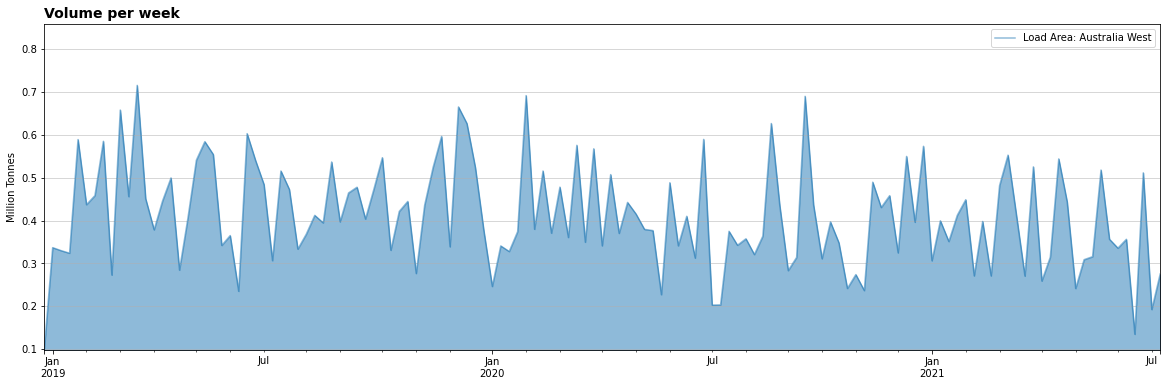

In [25]:
fig, axs = plt.subplots(figsize=(20,6))
volume_per_week.plot(ax=axs, x='first_load_arrival_date', y='deadweight', kind ='area', stacked=False)

# Properties
axs.set_xlabel('')
axs.set_ylabel('Million Tonnes')
axs.set_title('Volume per week',  fontsize=14, fontweight='bold', loc='left',)
axs.legend([f'Load Area: {area_of_interest}'])
axs.set_ylim([min(volume_per_week['deadweight']), 1.2*max(volume_per_week['deadweight'])]);
axs.grid(which='major', axis='y', linewidth=0.5)

### 3.2. Plot: Countries of Destination

The countries of destination plot gives insight to which country the cargo from the specified load area ends up in and in what amount. <br>
To plot it, we need to re-filter the voyages dataframe by date in order to get the date-range of interest. Also, we need to group voyages by discharge country and calculate the percentage of deadweight being imported/exported compared to all the other countries.

First off, specify a new starting date:

In [26]:
date_from = date(2021,1,1) 

Caluclate countries of destination,

In [27]:
countries_of_destination = voyages_merged.loc[voyages_merged['first_load_arrival_date'].dt.date >= date_from].reset_index(drop=True)
countries_of_destination = countries_of_destination.groupby(pd.Grouper(key='discharge_country')).sum().reset_index().sort_values('deadweight', ascending=True).reset_index(drop=True)
countries_of_destination['%_deadweight'] = 100*countries_of_destination['deadweight']/countries_of_destination['deadweight'].sum()
countries_of_destination

,discharge_country,imo,voyage_number,deadweight,%_deadweight
0,South Africa,9433896,90,21118,0.200188
1,Chile,9563380,64,35052,0.332275
2,Finland,9616735,67,37196,0.352599
3,Germany,9709221,45,38792,0.367728
4,Saudi Arabia,18902065,178,53879,0.510745
5,Myanmar,18846770,168,62696,0.594326
6,Singapore,19157911,232,65334,0.619333
7,United Arab Emirates,19366829,119,68679,0.651042
8,Sri Lanka,19214993,147,69458,0.658426
9,Brazil,18921359,184,70161,0.665090


Plot the countries of destination chart as follows:

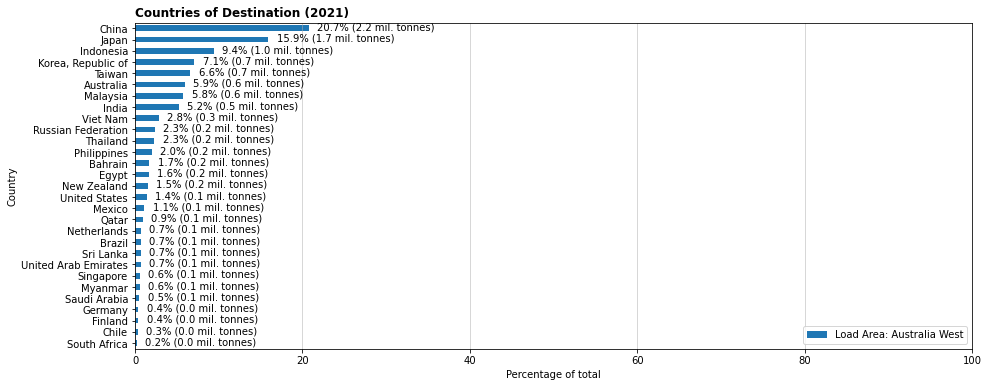

In [28]:
fig, axs = plt.subplots(figsize=(15,6))
countries_of_destination.plot.barh(ax=axs, y='%_deadweight', x='discharge_country')

# Properties
axs.set_title(f'Countries of Destination ({date_from.year})', loc='left', fontweight='bold')
axs.set_ylabel('Country')
axs.set_xlabel('Percentage of total')
axs.get_legend().remove()
axs.legend([f'Load Area: {area_of_interest}'], loc='lower right')

axs.set_xlim([0, 100])
axs.grid(which='major', axis='x', linewidth=0.5)

for i, v in enumerate(round(countries_of_destination['%_deadweight'],1)): # attach annotations at end of bars
    if countries_of_destination['%_deadweight'][i] >= 0.1:
        dwt = countries_of_destination['deadweight'][i]
        axs.text(v + 1, i - 0.15, f'{v}% ({round(dwt/1e6,1)} mil. tonnes)', color='black')

### 3.3. Plot: Volume Per Month 

The volume per month plot is useful in visualizing how the volume of cargo being transported from/to the specified area changes from year to year on a monthly level.

First, specify how many years back, from the current year, we want to compare and aggregate the voyages deadweight into the respective date-range bins:

In [29]:
years_back = 3

Calculate volume per month,

In [30]:
# Create a new dataframe and aggregate cargo by month and year (multiIndex)
vpm = voyages_merged[['first_load_arrival_date', 'deadweight']].set_index('first_load_arrival_date')
volume_per_month = vpm.groupby([vpm.index.month, vpm.index.year]).sum()
volume_per_month.index.rename(['month','year'], inplace=True)

# Filter to last "years_back" years
years = volume_per_month.index.get_level_values('year')
volume_per_month = volume_per_month[years > (date.today().year - years_back)]

volume_per_month['deadweight'] /= 1e6 # in million tonnes
volume_per_month

deadweight
month year            
1     2019    1.891055
      2020    1.640341
      2021    1.719041
2     2019    1.725559
      2020    1.958991
      2021    1.426102
3     2019    2.313323
      2020    2.019365
      2021    1.984029
4     2019    1.701125
      2020    1.762816
      2021    1.484812
5     2019    2.181109
      2020    1.748893
      2021    1.630535
6     2019    2.036182
      2020    1.686464
      2021    1.485723
7     2019    1.756801
      2020    1.320601
      2021    0.818855
8     2019    1.913374
      2020    1.875982
9     2019    1.922448
      2020    1.831417
10    2019    1.868395
      2020    1.426749
11    2019    1.949138
      2020    1.654137
12    2019    2.292285
      2020    2.005548

We can now plot the volume per month chart as follows:

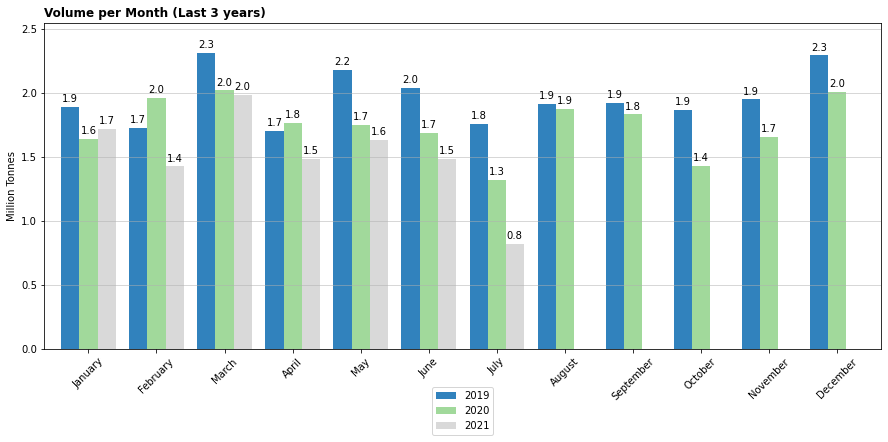

In [31]:
fig, axs = plt.subplots(figsize=(15,6))
volume_per_month.unstack().plot(kind='bar', ax=axs, width=0.8, colormap='tab20c')

# Properties
axs.set_title(f'Volume per Month (Last {years_back} years)', loc='left', fontweight='bold')
axs.set_ylabel('Million Tonnes')
axs.set_xlabel('')
axs.legend(years.unique(), loc='upper center', bbox_to_anchor=(0.5, -0.1))
axs.set_ylim([0, 1.1*max(volume_per_month['deadweight'])])

months = list(map(str, volume_per_month.index.get_level_values('month').array.unique()))
months = [datetime.strftime(datetime.strptime(m, '%m'), '%B') for m in months]
axs.set_xticklabels(months, rotation=45)

axs.grid(which='major', axis='y', linewidth=0.5)

for bar in axs.patches:
    if bar.get_height() > 0:
        axs.annotate(format(bar.get_height(), '0.1f'),
                    (bar.get_x() + bar.get_width()/2,
                     bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')